<a href="https://colab.research.google.com/github/riccricc91/Kaggle/blob/master/time_series_dgx_data_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
  print(tf.__version__)
except Exception:
  pass

import tensorflow as tf
import pandas as pd

import matplotlib.pyplot as plt

from tensorflow.keras.layers import (Input, Activation, Dense, Flatten, Conv1D, 
                                     LSTM, Dropout, BatchNormalization)

import numpy as np
import plotly.offline as pyo
import plotly.graph_objs as go

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        a =1

# Any results you write to the current directory are saved as output.

/kaggle/input/sandp500/getSandP.py
/kaggle/input/sandp500/all_stocks_5yr.csv
/kaggle/input/sandp500/merge.sh
/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/UAA_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/CAG_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/QRVO_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/KHC_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/EQIX_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/O_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/AIV_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/AMGN_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/CCI_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/FLS_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/BHF_data.csv
/kaggle/in

In [0]:
#URL = '/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/DGX_data.csv'
#URL = '/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/MOS_data.csv'
URL = '/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/INCY_data.csv'

In [0]:
data = pd.read_csv(URL)

In [0]:
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,18.00,18.32,17.9501,18.32,968510,INCY
1,2013-02-11,18.33,18.64,18.2800,18.36,1236607,INCY
2,2013-02-12,18.40,18.52,18.2600,18.42,1063365,INCY
3,2013-02-13,18.30,18.66,18.1600,18.65,2593368,INCY
4,2013-02-14,19.29,21.00,18.3300,20.56,4903925,INCY


In [0]:
series = data['open'].to_numpy()
time   = data['date']

In [0]:
trace = go.Scatter(x=time, y=series,
                   mode='markers', name='markers')

In [0]:
layout = go.Layout(title='Time Series',
                   xaxis = {'title':'time'},
                   yaxis = {'title':'series'},
                   )

In [0]:
data = [trace]

In [0]:
fig = go.Figure(data=data, layout=layout)

In [0]:
fig.show()

In [0]:
split_time = int(0.7*len(series))

In [0]:
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 30
batch_size = 32
shuffle_buffer_size = 700

In [0]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

In [0]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [0]:
window_size = 64
batch_size = 256

In [0]:
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

In [0]:
tf.keras.backend.clear_session()

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

In [0]:
class model_1 (tf.keras.Model):
    
    def __init__(self):
       
        super(model_1, self).__init__()
        
        self.conv_1 = Conv1D(32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1])
        
        self.LSTM_1 = LSTM(64, return_sequences=True)
        self.LSTM_2 = LSTM(64, return_sequences=True) 
  
        self.flatten = tf.keras.layers.Flatten()
 
        self.dense_1 = tf.keras.layers.Dense(units=30, activation='relu')
        self.dense_2 = tf.keras.layers.Dense(units=10, activation='relu')
        self.dense_3 = tf.keras.layers.Dense(units=1)
        self.lamda_1 = tf.keras.layers.Lambda(lambda x: x * 400)
        
    def call(self, inputs):

        x = self.conv_1(inputs)
        x = self.LSTM_1(x)
        x = self.LSTM_2(x)
                
        x = self.flatten(x)
        x = self.dense_1(x)     
        x = self.dense_2(x)
        x = self.dense_3(x)
        x = self.lamda_1(x)
        
        return x

In [0]:
model = model_1()

In [0]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8 * 10**(epoch / 20))

In [0]:
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

In [0]:
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
4/4 [==============================] - 5s 1s/step - loss: 218.2334 - mae: 218.0846
Epoch 2/100
4/4 [==============================] - 1s 248ms/step - loss: 216.4905 - mae: 215.5388
Epoch 3/100
4/4 [==============================] - 1s 255ms/step - loss: 209.7810 - mae: 210.7778
Epoch 4/100
4/4 [==============================] - 1s 239ms/step - loss: 203.2591 - mae: 204.2444
Epoch 5/100
4/4 [==============================] - 1s 244ms/step - loss: 197.3511 - mae: 196.2899
Epoch 6/100
4/4 [==============================] - 1s 254ms/step - loss: 186.7576 - mae: 187.3043
Epoch 7/100
4/4 [==============================] - 1s 243ms/step - loss: 175.5592 - mae: 177.8234
Epoch 8/100
4/4 [==============================] - 1s 247ms/step - loss: 167.0701 - mae: 167.9600
Epoch 9/100
4/4 [==============================] - 1s 240ms/step - loss: 155.5059 - mae: 157.1178
Epoch 10/100
4/4 [==============================] - 1s 250ms/step - loss: 141.8155 - mae: 144.4730
Epoch 11/100
4/4 [====

4/4 [==============================] - 1s 237ms/step - loss: 24.6161 - mae: 25.7565
Epoch 86/100
4/4 [==============================] - 1s 239ms/step - loss: 28.5101 - mae: 30.0942
Epoch 87/100
4/4 [==============================] - 1s 252ms/step - loss: 30.5557 - mae: 30.6430
Epoch 88/100
4/4 [==============================] - 1s 291ms/step - loss: 29.4391 - mae: 30.5089
Epoch 89/100
4/4 [==============================] - 1s 259ms/step - loss: 25.0521 - mae: 26.1805
Epoch 90/100
4/4 [==============================] - 1s 243ms/step - loss: 25.3613 - mae: 25.1592
Epoch 91/100
4/4 [==============================] - 1s 238ms/step - loss: 24.6614 - mae: 24.6367
Epoch 92/100
4/4 [==============================] - 1s 271ms/step - loss: 24.6571 - mae: 24.9557
Epoch 93/100
4/4 [==============================] - 1s 244ms/step - loss: 25.4398 - mae: 25.5791
Epoch 94/100
4/4 [==============================] - 1s 284ms/step - loss: 25.9156 - mae: 25.9073
Epoch 95/100
4/4 [=========================

[1e-08, 0.0001, 0, 60]

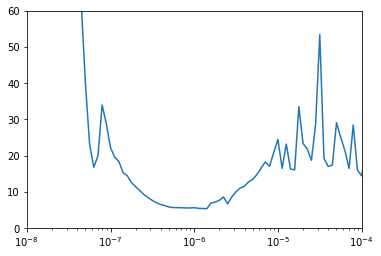

In [0]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 60])

In [0]:
tf.keras.backend.clear_session()
train_set = windowed_dataset(x_train, window_size=60, batch_size=50, shuffle_buffer=shuffle_buffer_size)

In [0]:
model = tf.keras.models.Sequential([
          tf.keras.layers.Conv1D(filters=60, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
          tf.keras.layers.LSTM(60, return_sequences=True),
          tf.keras.layers.LSTM(60, return_sequences=True),
          tf.keras.layers.Dense(30, activation="relu"),
          tf.keras.layers.Dense(10, activation="relu"),
          tf.keras.layers.Dense(1),
          tf.keras.layers.Lambda(lambda x: x * 50) 
])

In [0]:
optimizer = tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=500)

Epoch 1/500
17/17 [==============================] - 5s 278ms/step - loss: 58.9906 - mae: 59.9176
Epoch 2/500
17/17 [==============================] - 1s 82ms/step - loss: 36.9963 - mae: 37.5658
Epoch 3/500
17/17 [==============================] - 1s 81ms/step - loss: 24.3887 - mae: 24.9278
Epoch 4/500
17/17 [==============================] - 1s 80ms/step - loss: 22.2132 - mae: 22.6881
Epoch 5/500
17/17 [==============================] - 1s 79ms/step - loss: 18.2688 - mae: 18.8716
Epoch 6/500
17/17 [==============================] - 1s 80ms/step - loss: 15.4633 - mae: 15.9948
Epoch 7/500
17/17 [==============================] - 1s 83ms/step - loss: 11.9153 - mae: 12.3924
Epoch 8/500
17/17 [==============================] - 1s 81ms/step - loss: 9.2331 - mae: 9.7734
Epoch 9/500
17/17 [==============================] - 1s 81ms/step - loss: 7.9877 - mae: 8.4739
Epoch 10/500
17/17 [==============================] - 1s 78ms/step - loss: 8.1934 - mae: 8.6710
Epoch 11/500
17/17 [==============

17/17 [==============================] - 1s 80ms/step - loss: 2.1650 - mae: 2.5940
Epoch 87/500
17/17 [==============================] - 1s 81ms/step - loss: 2.1938 - mae: 2.6206
Epoch 88/500
17/17 [==============================] - 1s 84ms/step - loss: 2.2529 - mae: 2.6818
Epoch 89/500
17/17 [==============================] - 1s 82ms/step - loss: 2.1410 - mae: 2.5771
Epoch 90/500
17/17 [==============================] - 1s 81ms/step - loss: 2.1608 - mae: 2.5960
Epoch 91/500
17/17 [==============================] - 1s 87ms/step - loss: 2.0930 - mae: 2.5313
Epoch 92/500
17/17 [==============================] - 2s 91ms/step - loss: 2.2474 - mae: 2.6764
Epoch 93/500
17/17 [==============================] - 2s 91ms/step - loss: 2.1873 - mae: 2.6357
Epoch 94/500
17/17 [==============================] - 1s 83ms/step - loss: 2.1632 - mae: 2.5852
Epoch 95/500
17/17 [==============================] - 1s 81ms/step - loss: 2.0704 - mae: 2.5019
Epoch 96/500
17/17 [==============================] -

17/17 [==============================] - 1s 79ms/step - loss: 1.8144 - mae: 2.2580
Epoch 171/500
17/17 [==============================] - 1s 84ms/step - loss: 1.6296 - mae: 2.0328
Epoch 172/500
17/17 [==============================] - 1s 80ms/step - loss: 1.7754 - mae: 2.2052
Epoch 173/500
17/17 [==============================] - 1s 79ms/step - loss: 1.7075 - mae: 2.1319
Epoch 174/500
17/17 [==============================] - 1s 80ms/step - loss: 1.6584 - mae: 2.0703
Epoch 175/500
17/17 [==============================] - 1s 81ms/step - loss: 1.7868 - mae: 2.2034
Epoch 176/500
17/17 [==============================] - 1s 80ms/step - loss: 2.1564 - mae: 2.6240
Epoch 177/500
17/17 [==============================] - 1s 81ms/step - loss: 1.6883 - mae: 2.1075
Epoch 178/500
17/17 [==============================] - 1s 80ms/step - loss: 1.5832 - mae: 2.0023
Epoch 179/500
17/17 [==============================] - 1s 85ms/step - loss: 1.5574 - mae: 1.9744
Epoch 180/500
17/17 [=======================

17/17 [==============================] - 1s 84ms/step - loss: 1.4427 - mae: 1.8611
Epoch 255/500
17/17 [==============================] - 1s 82ms/step - loss: 1.4355 - mae: 1.8597
Epoch 256/500
17/17 [==============================] - 1s 80ms/step - loss: 1.3966 - mae: 1.8010
Epoch 257/500
17/17 [==============================] - 1s 82ms/step - loss: 1.4704 - mae: 1.8737
Epoch 258/500
17/17 [==============================] - 1s 83ms/step - loss: 1.5479 - mae: 1.9709
Epoch 259/500
17/17 [==============================] - 1s 81ms/step - loss: 1.4758 - mae: 1.9077
Epoch 260/500
17/17 [==============================] - 1s 81ms/step - loss: 1.4322 - mae: 1.8532
Epoch 261/500
17/17 [==============================] - 1s 82ms/step - loss: 1.5651 - mae: 1.9851
Epoch 262/500
17/17 [==============================] - 1s 82ms/step - loss: 1.5388 - mae: 1.9503
Epoch 263/500
17/17 [==============================] - 1s 83ms/step - loss: 1.6425 - mae: 2.0795
Epoch 264/500
17/17 [=======================

17/17 [==============================] - 1s 88ms/step - loss: 1.3291 - mae: 1.7366
Epoch 339/500
17/17 [==============================] - 2s 90ms/step - loss: 1.3135 - mae: 1.7181
Epoch 340/500
17/17 [==============================] - 2s 93ms/step - loss: 1.3986 - mae: 1.8108
Epoch 341/500
17/17 [==============================] - 2s 90ms/step - loss: 1.3737 - mae: 1.7928
Epoch 342/500
17/17 [==============================] - 2s 90ms/step - loss: 1.3171 - mae: 1.7389
Epoch 343/500
17/17 [==============================] - 1s 87ms/step - loss: 1.3059 - mae: 1.7266
Epoch 344/500
17/17 [==============================] - 1s 83ms/step - loss: 1.3416 - mae: 1.7486
Epoch 345/500
17/17 [==============================] - 1s 82ms/step - loss: 1.3355 - mae: 1.7304
Epoch 346/500
17/17 [==============================] - 1s 81ms/step - loss: 1.4223 - mae: 1.8567
Epoch 347/500
17/17 [==============================] - 1s 82ms/step - loss: 1.3987 - mae: 1.8187
Epoch 348/500
17/17 [=======================

17/17 [==============================] - 1s 82ms/step - loss: 1.2888 - mae: 1.7147
Epoch 423/500
17/17 [==============================] - 1s 82ms/step - loss: 1.3034 - mae: 1.7211
Epoch 424/500
17/17 [==============================] - 1s 82ms/step - loss: 1.3178 - mae: 1.7310
Epoch 425/500
17/17 [==============================] - 1s 82ms/step - loss: 1.3857 - mae: 1.8005
Epoch 426/500
17/17 [==============================] - 1s 81ms/step - loss: 1.3205 - mae: 1.7504
Epoch 427/500
17/17 [==============================] - 1s 81ms/step - loss: 1.2663 - mae: 1.6804
Epoch 428/500
17/17 [==============================] - 1s 84ms/step - loss: 1.3112 - mae: 1.7075
Epoch 429/500
17/17 [==============================] - 1s 82ms/step - loss: 1.2854 - mae: 1.6933
Epoch 430/500
17/17 [==============================] - 1s 82ms/step - loss: 1.2691 - mae: 1.6866
Epoch 431/500
17/17 [==============================] - 1s 86ms/step - loss: 1.2552 - mae: 1.6683
Epoch 432/500
17/17 [=======================

In [0]:
rnn_forecast = model_forecast(model, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

In [0]:
true_value = go.Scatter(x=time_valid, y=x_valid,
                   mode='lines',
                    name='true_value',
                    marker = dict(
                       size = 12,
                       color = 'rgb(51,204,153)',
                   )
                       )
                    

predic_value = go.Scatter(x=time_valid, y=rnn_forecast,
                   mode='lines',
                    name='predic_value',
                    marker = dict(
                       size = 12,
                       color = 'rgb(200,204,20)',
                   )
                )

In [0]:
data = [true_value,predic_value]

In [0]:
layout = go.Layout(title='Compare true values and predict values')

In [0]:
fig = go.Figure(data=data, layout=layout)

In [0]:
fig.show()